In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#import missingno as msno
#import pandas_profiling as pdp

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
#import lightgbm as lgbm
#import catboost as cb

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'xgboost'

# Data loading and overview

In [51]:
df = pd.read_csv(r"D:\Downloads\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [52]:
df.shape

(5110, 12)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [54]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [55]:
df.dropna(inplace = True)

In [56]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [57]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# EDA

## BOXPLOT

<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

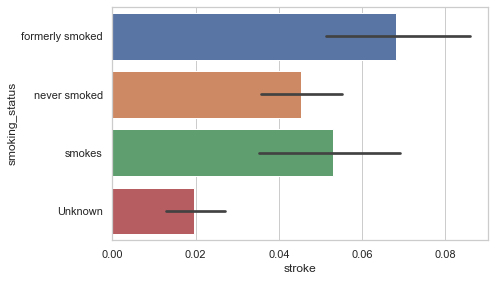

In [58]:
sns.barplot(x = 'stroke', y = 'smoking_status', data = df)

'Unknown' and 'never smoker' has a low percentage of strokes in the sample. Let's combine them into one group: 'never smoker'.

In [59]:
replace_values = {'Unknown': 'never smoked'}

df = df.replace({'smoking_status': replace_values})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<AxesSubplot:xlabel='smoking_status', ylabel='age'>

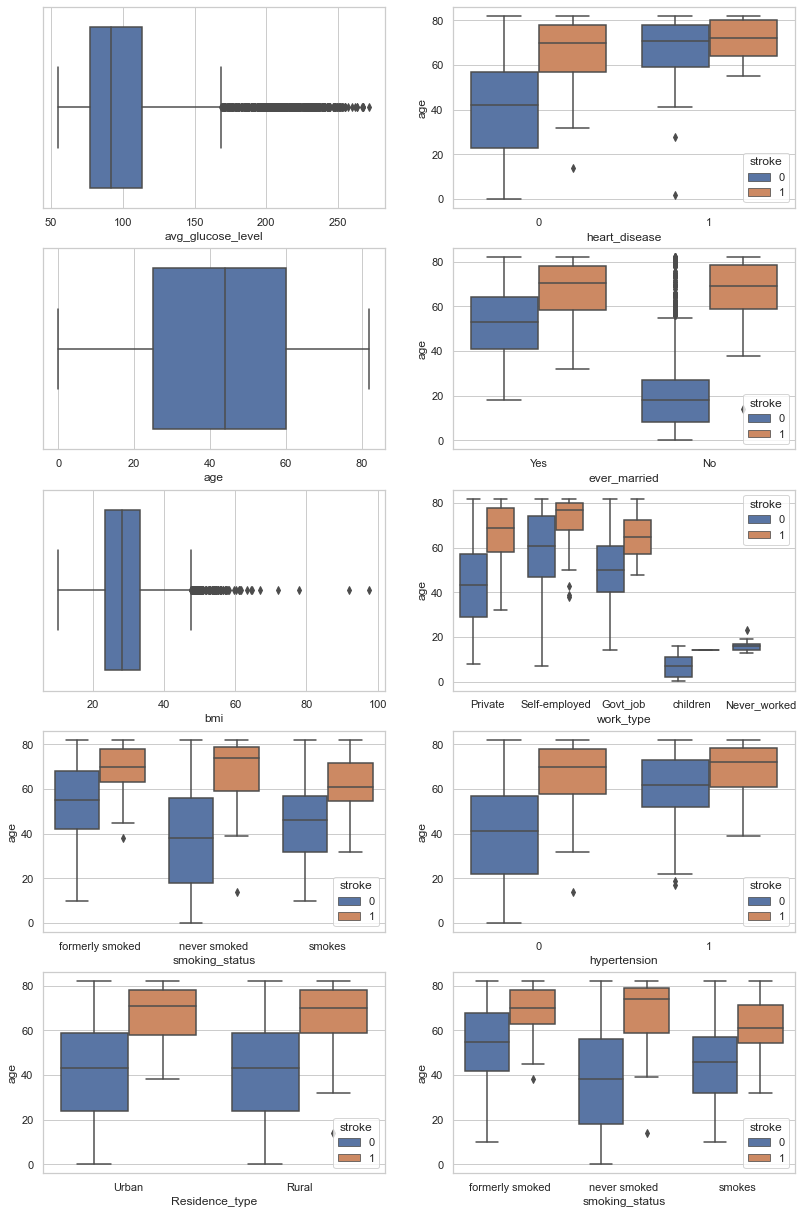

In [60]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes[0][0])
sns.boxplot(x = 'age', data = df, ax=axes[1][0])
sns.boxplot(x = 'bmi', data = df, ax=axes[2][0])
sns.boxplot(x = 'smoking_status', y = 'age', hue = 'stroke', data = df, ax=axes[3][0])
sns.boxplot(x = 'hypertension',y = 'age', hue = 'stroke', data = df, ax=axes[3][1])
sns.boxplot(x = 'heart_disease', y= 'age', hue = 'stroke', data = df, ax=axes[0][1])
sns.boxplot(x = 'ever_married',y = 'age', hue = 'stroke', data = df, ax = axes[1][1])
sns.boxplot(x = 'work_type',y = 'age',hue = 'stroke', data = df, ax = axes[2][1])
sns.boxplot(x = 'Residence_type',y = 'age',hue = 'stroke', data = df, ax = axes[4][0])
sns.boxplot(x = 'smoking_status',y = 'age', hue = 'stroke', data = df, ax = axes[4][1])

Good insights :)

We have oultiers in avg_glucose_level and bmi.

### Remove outliers

In [61]:
### Thanks for the function https://www.kaggle.com/ankitak46

def remove_outliers(data):
    arr=[]
    #print(max(list(data)))
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    #print(mi,ma)
    for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [62]:
df['bmi'] = remove_outliers(df['bmi'])
df['avg_glucose_level'] = remove_outliers(df['avg_glucose_level'])
print('Outliers successfully removed')

Outliers successfully removed


<AxesSubplot:xlabel='avg_glucose_level'>

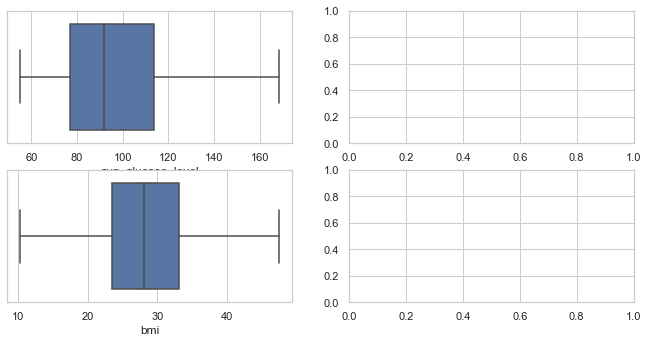

In [63]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
sns.boxplot(x = 'bmi', data = df, ax=axes[1][0])
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes[0][0])

In [64]:
df = df.drop('id', axis = 1)

In [65]:
df.shape

(4909, 11)

# Preprocessing

In [66]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['Residence_type'] = le1.fit_transform(df['Residence_type'])
df['ever_married'] = le1.fit_transform(df['ever_married'])
df['gender'] = le1.fit_transform(df['gender'])
df['work_type'] = le1.fit_transform(df['work_type'])
df['smoking_status'] = le1.fit_transform(df['smoking_status'])

In [67]:
print(df['smoking_status'].unique())

[0 1 2]


In [68]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,168.32,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,168.32,34.4,2,1
4,0,79.0,1,0,1,3,0,168.32,24.0,1,1
5,1,81.0,0,0,1,2,1,168.32,29.0,0,1


In [69]:
df[200:220]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
239,1,60.0,0,1,1,2,1,91.92,35.9,2,1
240,1,66.0,0,0,1,2,0,76.46,21.2,0,1
241,1,57.0,0,0,1,2,0,168.32,34.5,0,1
242,1,68.0,0,0,1,2,0,168.32,42.4,1,1
243,0,68.0,1,1,1,2,1,168.32,40.5,0,1
244,1,57.0,0,0,1,2,0,84.96,36.7,1,1
245,0,14.0,0,0,0,4,0,57.93,30.9,1,1
246,0,75.0,0,0,1,3,0,78.80,29.3,0,1
248,0,78.0,0,0,1,2,0,78.81,19.6,1,1
249,1,3.0,0,0,0,4,0,95.12,18.0,1,0


In [70]:
import joblib
joblib.dump(le1,"transform")

['transform']

In [71]:
df.shape


(4909, 11)

In [72]:
df.iloc[0,:]

gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           1.00
work_type              2.00
Residence_type         1.00
avg_glucose_level    168.32
bmi                   36.60
smoking_status         0.00
stroke                 1.00
Name: 0, dtype: float64

In [73]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,168.32,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,168.32,34.4,2,1
4,0,79.0,1,0,1,3,0,168.32,24.0,1,1
5,1,81.0,0,0,1,2,1,168.32,29.0,0,1


In [74]:
df.shape

(4909, 11)

In [75]:
X = df.iloc[:,0:10].values
y = df.iloc[:,10].values

# Model

In [76]:
X.shape

(4909, 10)

In [77]:
y.shape

(4909,)

### We use sampling because there is an imbalance of the target feature

<AxesSubplot:ylabel='count'>

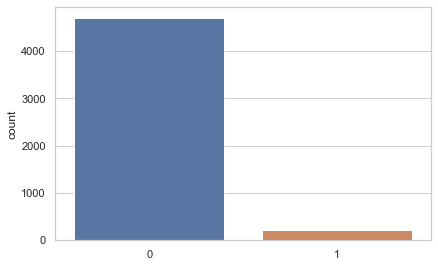

In [78]:
### before oversampling

sns.countplot(y)

In [79]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

ModuleNotFoundError: No module named 'imblearn'

In [80]:
### after oversampling

sns.countplot(y_res)

NameError: name 'y_res' is not defined

Oversampling is successful

# Modeling

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Decision Tree

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(confusion_matrix(dtc_pred, y_test))
print('-----')
print(classification_report(dtc_pred, y_test))

NameError: name 'confusion_matrix' is not defined

## Random Forest

In [83]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(rf_pred, y_test))
print('-----')
print(classification_report(rf_pred, y_test))

NameError: name 'confusion_matrix' is not defined

### It's best F1 score

## Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(lr_pred, y_test))
print('-----')
print(classification_report(lr_pred, y_test))

NameError: name 'confusion_matrix' is not defined

## SVC

In [85]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(confusion_matrix(svc_pred, y_test))
print('-----')
print(classification_report(svc_pred, y_test))

NameError: name 'confusion_matrix' is not defined

## KNN

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(knn_pred, y_test))
print('-----')
print(classification_report(knn_pred, y_test))

NameError: name 'confusion_matrix' is not defined

# Grid Search

In [87]:
cross_valid_scores = {}

## Decision Tree

In [88]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_dtc = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_dtc = GridSearchCV(
    model_dtc, 
    parameters, 
    cv=5,
)

model_dtc.fit(X_train, y_train)
model_dtc_pred = model_dtc.predict(X_test)
print(classification_report(model_dtc_pred, y_test))

print('-----')
print(f'Best parameters {model_dtc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_dtc.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_dtc.best_score_
print('-----')


NameError: name 'GridSearchCV' is not defined

## Random Forest

In [89]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_rf = GridSearchCV(
    model_rf, 
    parameters, 
    cv=5,
)

model_rf.fit(X_train, y_train)
model_rf_pred = model_rf.predict(X_test)
print(classification_report(model_rf_pred, y_test))

print('-----')
print(f'Best parameters {model_rf.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_rf.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_rf.best_score_
print('-----')

NameError: name 'GridSearchCV' is not defined

In [90]:
import pickle
pickle.dump(lr,open("modelor.pkl","wb"))

## XGBoost

In [91]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier(
    random_state=42, verbosity = 0
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X_train, y_train)
model_xgb_pred = model_xgb.predict(X_test)
print(classification_report(model_xgb_pred, y_test))


print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
print('-----')

NameError: name 'xgb' is not defined

## LightGBM

In [92]:
%%time
parameters = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
}

model_lgbm = lgbm.LGBMClassifier(
    random_state=42,
    class_weight='balanced',
)

model_lgbm = GridSearchCV(
    model_lgbm, 
    parameters, 
    cv=5)

model_lgbm.fit(X_train, y_train)
model_lgbm_pred = model_lgbm.predict(X_test)
print(classification_report(model_lgbm_pred, y_test))

print('-----')
print(f'Best parameters {model_lgbm.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_lgbm.best_score_:.3f}'
)
cross_valid_scores['lightgbm'] = model_lgbm.best_score_
print('-----')

NameError: name 'lgbm' is not defined

## Adaboost

In [93]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

model_adaboost = AdaBoostClassifier(
    random_state=42,
)

model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_adaboost.fit(X_train, y_train)
model_adaboost_pred = model_adaboost.predict(X_test)
print(classification_report(model_adaboost_pred, y_test))

print('-----')
print(f'Best parameters {model_adaboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_adaboost.best_score_:.3f}'
)
cross_valid_scores['ada_boost'] = model_adaboost.best_score_
print('-----')

NameError: name 'GridSearchCV' is not defined

## Logistic Regression

In [94]:
%%time
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_lr = LogisticRegression(
    random_state=42,
    class_weight="balanced",
    solver="liblinear",
)

model_lr = GridSearchCV(
    model_lr, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_lr.fit(X_train, y_train)
model_lr_pred = model_lr.predict(X_test)
print(classification_report(model_lr_pred, y_test))

print('-----')
print(f'Best parameters {model_lr.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_lr.best_score_:.3f}'
)
cross_valid_scores['logistic_regression'] = model_lr.best_score_
print('-----')

NameError: name 'GridSearchCV' is not defined

## KNN

In [95]:
%%time
parameters = {
    "weights": ["uniform", "distance"],
}

model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(X_train, y_train)
model_k_neighbors_pred = model_k_neighbors.predict(X_test)
print(classification_report(model_k_neighbors_pred, y_test))

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

NameError: name 'GridSearchCV' is not defined

# Thank for watching!

In [96]:
import pickle
pickle.dump(df,open("model.pkl","wb"))